# Jet Analysis

## Load Files

In [146]:
# preperations
import numpy as np
import matplotlib.pyplot as plt

twopi = 6.283185307179586476925286766559005768394
pi = 0.5*twopi

# define plot style
width = 0.05
plotMarkerSize = 8
labelfontsize = 15
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [6., 4.5]
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.8
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.8
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = "in"
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['legend.numpoints'] = 1
mpl.rcParams['font.size'] = 15
mpl.rcParams['savefig.format'] = "pdf"

In [147]:
# Set File Paths
file_pp = '../data/jet_pp.dat'
file_pbpb = '../data/jet_pbpb.dat'

# Load files
data_pp = np.loadtxt(file_pp, delimiter=',')
data_pbpb = np.loadtxt(file_pbpb, delimiter=',')


i_pp = data_pp[:,0] 
i_pbpb = data_pbpb[:,0] 

jet_id_pp = np.where(i_pp < 0.1)
jet_id_pbpb = np.where(i_pbpb < 0.1)

# Extract jets
jets_pp = data_pp[jet_id_pp]
jets_pbpb = data_pbpb[jet_id_pbpb]

# Extract associated charged particles for pp
assoc_pp= []
for i in range(len(jet_id_pp[0])-1):
  chunck = data_pp[jet_id_pp[0][i]+1:jet_id_pp[0][i+1]]
  assoc_pp.append(chunck)
chunck = data_pp[jet_id_pp[0][-1]+1:]
assoc_pp.append(chunck)

# Extract associated charged particles for pbpb
assoc_pbpb= []
for i in range(len(jet_id_pbpb[0])-1):
  chunck = data_pbpb[jet_id_pbpb[0][i]+1:jet_id_pbpb[0][i+1]]
  assoc_pbpb.append(chunck)
chunck = data_pbpb[jet_id_pbpb[0][-1]+1:]
assoc_pbpb.append(chunck)


## Jet Spectrum

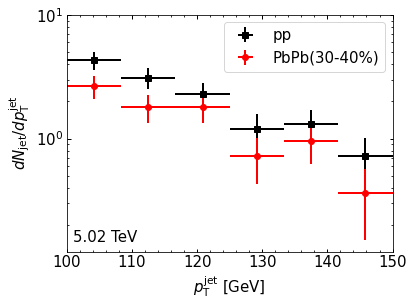

In [148]:
# Prepare arrays of Jet-pT
jet_pt_pp_in = jets_pp[:,1]
jet_pt_pbpb_in = jets_pbpb[:,1]

# Fill Histogram
n_pp, pt = np.histogram(jet_pt_pp_in, bins=np.linspace(100, 150, 7) )
n_pbpb, pt = np.histogram(jet_pt_pbpb_in, bins=np.linspace(100, 150, 7) )

# Statistical Errors
err_n_pp = np.sqrt(n_pp)
err_n_pbpb = np.sqrt(n_pbpb)

# bin width
dpt = (pt[1:]-pt[:-1])
# bin center
pt = pt[0:-1] + 0.5*dpt

# Jet Spectrum
dn_dpt_pp = n_pp/dpt
dn_dpt_pbpb = n_pbpb/dpt

# Errors 
err_dn_dpt_pp = err_n_pp/dpt
err_dn_dpt_pbpb = err_n_pbpb/dpt

# Generate Plots
fig = plt.figure()

plt.errorbar(pt, dn_dpt_pp, fmt='s', label="pp",
             xerr=0.5*dpt, yerr=err_dn_dpt_pp, color='black')

plt.errorbar(pt, dn_dpt_pbpb, fmt='o', label="PbPb(30-40%)",
             xerr=0.5*dpt, yerr=err_dn_dpt_pbpb, color='red')

#axes setting
plt.yscale('log')
plt.legend(loc=0)
plt.xlabel(r"$p^{\mathrm{jet}}_{\mathrm{T}}$ [GeV]")
plt.ylabel(r"$dN_{\mathrm{jet}}/dp^{\mathrm{jet}}_{\mathrm{T}}$")
plt.xlim(100,150)
y_min = (dn_dpt_pbpb[-1]-err_dn_dpt_pbpb[-1])*0.8
y_max = (dn_dpt_pp[0]+err_dn_dpt_pp[0])*2.0
plt.ylim(y_min,y_max)
plt.text(101,y_min*1.2, '5.02 TeV')

# save plot to the Desktop
plt.tight_layout()
plt.savefig('n_jet')

## Jet-$R_{\mathrm{AA}}$

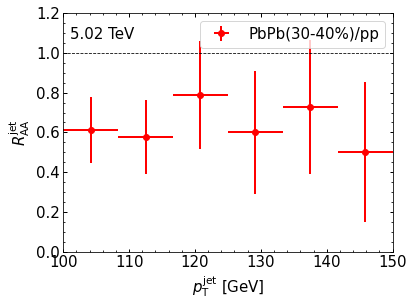

In [149]:
# Generate Plots
fig = plt.figure()

# Calculate RAA and error
raa =  dn_dpt_pbpb/dn_dpt_pp
error_raa = np.sqrt( (err_dn_dpt_pbpb/dn_dpt_pp)*(err_dn_dpt_pbpb/dn_dpt_pp) + (err_dn_dpt_pp*dn_dpt_pbpb/dn_dpt_pp/dn_dpt_pp) * (err_dn_dpt_pp*dn_dpt_pbpb/dn_dpt_pp/dn_dpt_pp) )

plt.errorbar(pt, raa, fmt='o', label="PbPb(30-40%)/pp",
             xerr=0.5*dpt, yerr=error_raa, color='red')


#axes setting
plt.legend(loc=0)
plt.xlabel(r"$p^{\mathrm{jet}}_{\mathrm{T}}$ [GeV]")
plt.ylabel(r"$R^{\mathrm{jet}}_{\mathrm{AA}}$")
plt.xlim(100,150)
plt.ylim(0.0,1.2)
plt.legend(loc=0)
plt.text(101,1.07, '5.02 TeV')
plt.axhline(1, color = "black", linestyle="dashed", linewidth=0.8) 

# save plot to the Desktop
plt.tight_layout()
plt.savefig('raa')

## Jet Fragmentation Function

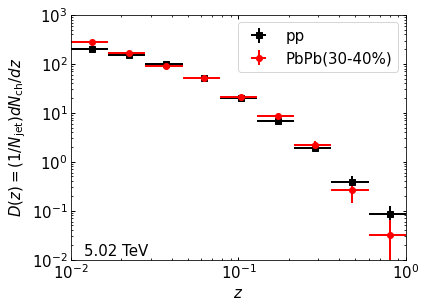

In [150]:
# Number of jets

n_jet_pp = len(jets_pp)
n_jet_pbpb = len(jets_pbpb)

# prepare arrays for z = pT_assoc/pTjet
z_pp_in = []
z_pbpb_in = []

# prepare arrays for associated's status
status_pp = []
status_pbpb = []

# z for pp
for i in range(n_jet_pp):
  pt_jet = jets_pp[i,1]
  for assoc in assoc_pp[i]:
    pt_assoc = assoc[1]
    z = pt_assoc/pt_jet
    z_pp_in.append(z)

    status = assoc[4]
    if not status < 0:
      status = 1
    status_pp.append(status)

# z for pbpb
for i in range(n_jet_pbpb):
  pt_jet = jets_pbpb[i,1]
  for assoc in assoc_pbpb[i]:
    pt_assoc = assoc[1]
    z = pt_assoc/pt_jet
    z_pbpb_in.append(z)

    status = assoc[4]
    if not status < 0:
      status = 1
    status_pbpb.append(status)


# Set Histogram bins
ex = np.linspace(-2, 0, 10)
z_bins = np.power(10,ex)

# Fill Histograms
n_pp, z = np.histogram(z_pp_in, bins=z_bins, weights = status_pp )
n_pbpb, z = np.histogram(z_pbpb_in, bins=z_bins, weights = status_pbpb )


# Statistical Errors
err_n_pp = np.sqrt(n_pp)
err_n_pbpb = np.sqrt(n_pbpb)

# bin width
dz = (z[1:]-z[:-1])
# bin center
z = z[0:-1] + 0.5*dz

# z-distribution
dn_dz_pp = n_pp/dz/n_jet_pp
dn_dz_pbpb = n_pbpb/dz/n_jet_pbpb

# Errors 
err_dn_dz_pp = err_n_pp/dz/n_jet_pp
err_dn_dz_pbpb = err_n_pbpb/dz/n_jet_pbpb

# Generate Plots
fig = plt.figure()

plt.errorbar(z, dn_dz_pp, fmt='s', label="pp",
             xerr=0.5*dz, yerr=err_dn_dz_pp, color='black')
plt.errorbar(z, dn_dz_pbpb, fmt='o', label="PbPb(30-40%)",
             xerr=0.5*dz, yerr=err_dn_dz_pbpb, color='red')


#axes setting
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=0)
plt.xlabel(r"$z$")
plt.ylabel(r"$D(z)=(1/N_{\mathrm{jet}})dN_{\mathrm{ch}}/dz}_{\mathrm{T}}$")
plt.xlim(z_bins[0],z_bins[-1])
y_min = 0.01
y_max = 1000
plt.ylim(y_min,y_max)
plt.text(0.012,y_min*1.2, '5.02 TeV')

# save plot to the Desktop
#plt.tight_layout()
plt.savefig('jet_ff')


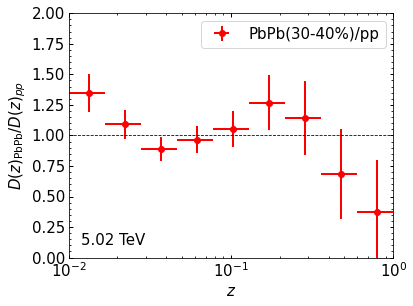

In [151]:
# Generate Plots
fig = plt.figure()

# Calculate RAA and error
raa =  dn_dz_pbpb/dn_dz_pp
error_raa = np.sqrt( (err_dn_dz_pbpb/dn_dz_pp)*(err_dn_dz_pbpb/dn_dz_pp) + (err_dn_dz_pp*dn_dz_pbpb/dn_dz_pp/dn_dz_pp) * (err_dn_dz_pp*dn_dz_pbpb/dn_dz_pp/dn_dz_pp) )

plt.errorbar(z, raa, fmt='o', label="PbPb(30-40%)/pp",
             xerr=0.5*dz, yerr=error_raa, color='red')


#axes setting
plt.legend(loc=0)
plt.xlabel(r"$z$")
plt.ylabel(r"$D(z)_{\mathrm{PbPb}}/D(z)_{pp}}$")
plt.xlim(z_bins[0],z_bins[-1])
plt.ylim(0.0,2.0)
plt.legend(loc=0)
plt.text(0.012,0.1, '5.02 TeV')
plt.xscale('log')

plt.axhline(1, color = "black", linestyle="dashed", linewidth=0.8) 

# save plot to the Desktop
plt.tight_layout()
plt.savefig('ratio_jet_ff')

## Jet Shape

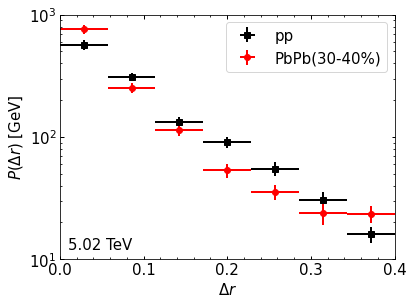

In [182]:
# Number of jets
n_jet_pp = len(jets_pp)
n_jet_pbpb = len(jets_pbpb)

# prepare arrays for delta_r = sqrt(delta_eta^2 + delta_phi^2)
dr_pp_in = []
dr_pbpb_in = []

# prepare arrays for pT_assoc
pt_pp = []
pt_pbpb = []

# Function to calculate delta_phi in [-pi,pi]
def delta_phi(phi_1, phi_2):
  dphi = phi_1 - phi_2
  if dphi >  pi: 
    dphi = dphi - twopi
  if dphi < -pi: 
    dphi = dphi + twopi
  return dphi;
  
#For pp
for i in range(n_jet_pp):
  eta_jet = jets_pp[i,2]
  phi_jet = jets_pp[i,3]  
  for assoc in assoc_pp[i]:

    eta_assoc = assoc[2]
    phi_assoc = assoc[3] 
    deta = eta_assoc - eta_jet
    dphi = delta_phi(phi_assoc, phi_jet)
    dr = np.sqrt(deta*deta + dphi*dphi)
    dr_pp_in.append(dr)

    pt_assoc = assoc[1]
    pt_pp.append(pt_assoc)

#For pbpb
for i in range(n_jet_pbpb):
  eta_jet = jets_pbpb[i,2]
  phi_jet = jets_pbpb[i,3]  
  for assoc in assoc_pbpb[i]:

    eta_assoc = assoc[2]
    phi_assoc = assoc[3] 
    deta = eta_assoc - eta_jet
    dphi = delta_phi(phi_assoc, phi_jet)
    dr = np.sqrt(deta*deta + dphi*dphi)
    dr_pbpb_in.append(dr)

    pt_assoc = assoc[1]
    status = assoc[4]
    if status < 0:
      pt_assoc = - pt_assoc
    pt_pbpb.append(pt_assoc)

# Fill Histograms
js_pp, r = np.histogram(dr_pp_in, bins=np.linspace(0, 0.4, 8), weights=pt_pp )
js_pbpb, r = np.histogram(dr_pbpb_in, bins=np.linspace(0, 0.4, 8), weights=pt_pbpb )

# Fill Histograms for error
w2_pp = np.array(pt_pp)*np.array(pt_pp)
e2_js_pp, r = np.histogram(dr_pp_in, bins=np.linspace(0, 0.4, 8), weights=w2_pp )
w2_pbpb = np.array(pt_pbpb)*np.array(pt_pbpb)
e2_js_pbpb, r = np.histogram(dr_pbpb_in, bins=np.linspace(0, 0.4, 8), weights=w2_pbpb )


# bin width
dr = (r[1:]-r[:-1])
# bin center
r = r[0:-1] + 0.5*dr

# derivative and division
js_pp = js_pp/dr/n_jet_pp
js_pbpb = js_pbpb/dr/n_jet_pbpb

# derivative and division (error)
err_js_pp = np.sqrt(e2_js_pp)/dr/n_jet_pp
err_js_pbpb = np.sqrt(e2_js_pbpb)/dr/n_jet_pbpb


# # Generate Plots
fig = plt.figure()
plt.errorbar(r, js_pp, fmt='s', label="pp", xerr=0.5*dr, yerr=err_js_pp, color='black')
plt.errorbar(r, js_pbpb, fmt='o', label="PbPb(30-40%)", xerr=0.5*dr, yerr=err_js_pbpb, color='red')

# #axes setting
plt.yscale('log')
plt.legend(loc=0)
plt.xlabel(r"$\Delta r$")
plt.ylabel(r"$P(\Delta r)$ [GeV]")
plt.xlim(0,0.4)
y_min = 10
y_max = 1000
plt.ylim(y_min,y_max)
plt.text(0.01,y_min*1.2, '5.02 TeV')

# # save plot to the Desktop
# #plt.tight_layout()
plt.savefig('jet_shape')


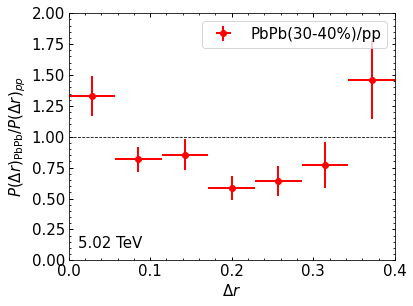

In [188]:
# Generate Plots
fig = plt.figure()

# Calculate RAA and error
raa =  js_pbpb/js_pp

error_raa = np.sqrt( (err_js_pbpb/js_pp)*(err_js_pbpb/js_pp) + (err_js_pp*js_pbpb/js_pp/js_pp)*(err_js_pp*js_pbpb/js_pp/js_pp) )

plt.errorbar(r, raa, fmt='o', label="PbPb(30-40%)/pp",
             xerr=0.5*dr, yerr=error_raa, color='red')


#axes setting
plt.legend(loc=0)
plt.xlabel(r"$\Delta r$")
plt.ylabel(r"$P(\Delta r)_{\mathrm{PbPb}}/P(\Delta r)_{pp}}$")
plt.xlim(0.0,0.4)
plt.ylim(0.0,2.0)
plt.legend(loc=0)
plt.text(0.012,0.1, '5.02 TeV')


plt.axhline(1, color = "black", linestyle="dashed", linewidth=0.8) 

# save plot to the Desktop
plt.tight_layout()
plt.savefig('ratio_jet_ff')